In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr, spearmanr
from UQ import get_UQ

In [7]:
freesolv_path = '/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/'
delaney_path = '/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/delaney/rdkit_subtraction_bilinear_hsize1024_hnum3_esize64_bsize256'
lipo_path = '/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/lipo/rdkit_subtraction_bilinear_hsize256_hnum3_esize32_bsize256'

subfolder = '05'

In [39]:
test_1, test_df = get_UQ(osp.join(freesolv_path, '20'), [])

removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/20/group_df


In [45]:
test_1['formula'][0]

/var/folders/z_/n6f8yjqx47gbn9rp9k360wv40000gn/T/ipykernel_93369/766215364.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_1['formula'][0]


'CCCc1ccccc1'

In [50]:
test_1.groupby('formula').

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [54]:
for end in os.listdir(freesolv_path):
    if end != 'old':
        folder = os.path.join(freesolv_path, end)
        get_UQ(folder)

removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/group_df
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/all_eval.pkl
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/group_df.pkl
removed existing group df!
removed existing eval df!
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/250/group_df
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/250/all_eval.pkl
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/250/group_df.pkl
removed existing group df!
removed existing eval df!
removed /Users/el

In [ ]:
base_path = os.path.join(delaney_path, subfolder)

ood = False

folders = [i[0] for i in os.walk(base_path) if i[0][-3] == '-' and i[0].count('/') == base_path.count('/') + 1]
# folders.remove('/Users/elimeyers/matexes/matex_nofeature/blt/log/molnet/delaney/rdkit_subtraction_bilinear_hsize1024_hnum3_esize64_bsize256/25-07-09_15-00-02')
# folders.remove('/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/lipo/rdkit_subtraction_bilinear_hsize256_hnum3_esize32_bsize256/25-07-29_09-49-00')
# folders.remove('')
# folders = folders[:5]

In [707]:
# newname = '05'
# i = folders[0].rindex('/')
# os.mkdir(f'{folders[0][:i+1]}{newname}')
# for j, folder in enumerate(folders):
#     os.rename(folder, f'{folder[:i+1]}{newname}/{folder[i+1:]}')
#     folders[j] = f'{folder[:i+1]}{newname}/{folder[i+1:]}'

In [708]:
datalist = [
    pd.read_pickle(f'{folder}/labelled_data.pkl') for folder in folders
]
oodlist = [
    pd.read_pickle(f'{folder}/bilinear_eval_ood.pkl') for folder in folders
]
in_distlist = [
    pd.read_pickle(f'{folder}/bilinear_eval_in_dist.pkl') for folder in folders
]

In [709]:
len(datalist[0]['train_formula'])

564

In [710]:
datalist[0].keys()

dict_keys(['train_X', 'train_Y', 'train_formula', 'eval_X', 'eval_Y', 'eval_formula', 'ood_X', 'ood_Y', 'ood_formula'])

In [711]:
for i in range(len(folders)):
    for key in oodlist[i].keys():
        if not isinstance(oodlist[i][key], list):
            oodlist[i][key] = oodlist[i][key].squeeze()
            in_distlist[i][key] = in_distlist[i][key].squeeze()
    oodlist[i]['formula'] = datalist[i]['ood_formula']
    in_distlist[i]['formula'] = datalist[i]['eval_formula']
    oodlist[i] = pd.DataFrame(oodlist[i])
    in_distlist[i] = pd.DataFrame(in_distlist[i])
all_ood = pd.concat(oodlist)
all_in_dist = pd.concat(in_distlist)

all_ood['error'] = all_ood['preds'] - all_ood['gt']
all_ood['abs_error'] = all_ood['error'].abs()
all_ood['sq_error'] = all_ood['error']**2

all_in_dist['error'] = all_in_dist['preds'] - all_in_dist['gt']
all_in_dist['abs_error'] = all_in_dist['error'].abs()
all_in_dist['sq_error'] = all_in_dist['error']**2

all_eval = pd.concat([all_ood, all_in_dist])
            

In [714]:
if ood:
    print('ood')
    group_ood = all_ood.groupby('formula').mean()
    group_ood['pred_std'] = all_ood.groupby('formula')['preds'].std()

    group_in_dist = all_in_dist.groupby('formula').mean()
    group_in_dist['pred_std'] = all_in_dist.groupby('formula')['preds'].std()

else:
    print('no OOD')
    group_df = all_eval.groupby('formula').mean()
    group_df['pred_std'] = all_eval.groupby('formula')['preds'].std()
    group_df['pred_std_inhouse'] = all_eval.groupby('formula')['sq_error'].mean()

no OOD


In [716]:
data = {
    # 'in_dist': in_distlist[0],
    'ood': group_df
}
# in_dist_gt = np.array(data["in_dist"]["gt"])
# in_dist_preds = np.array(data["in_dist"]["preds"])
ood_gt = np.array(data["ood"]["gt"])
ood_preds = np.array(data["ood"]["preds"])

In [717]:
mae_id = np.mean(np.abs(in_dist_gt - in_dist_preds))
mae_ood = np.mean(np.abs(ood_gt - ood_preds))
ood_thres = np.min(ood_gt)
TP = np.sum(ood_preds >= ood_thres)
FN = np.sum(ood_preds < ood_thres)
TPR = round(TP / (TP + FN), 3)

In [720]:
def plot_parity(ax, gt, preds, mae, color, label_prefix, yerr=None):
    """Helper function to plot scatter and add parity line."""
    mmax = min(max(gt), max(preds))
    mmin = max(min(gt),min(preds))
    ax.scatter(gt, preds, label=f'{label_prefix} MAE {round(mae, 2)}', color=color)
    if not yerr is None:
        plt.errorbar(gt, preds, yerr=yerr, capsize=0, ls='none', color=color)
    ax.axline((mmin, mmin), (mmax, mmax), linewidth=2, color='black')


Text(0.5, 1.0, 'bilinear Parity Plot')

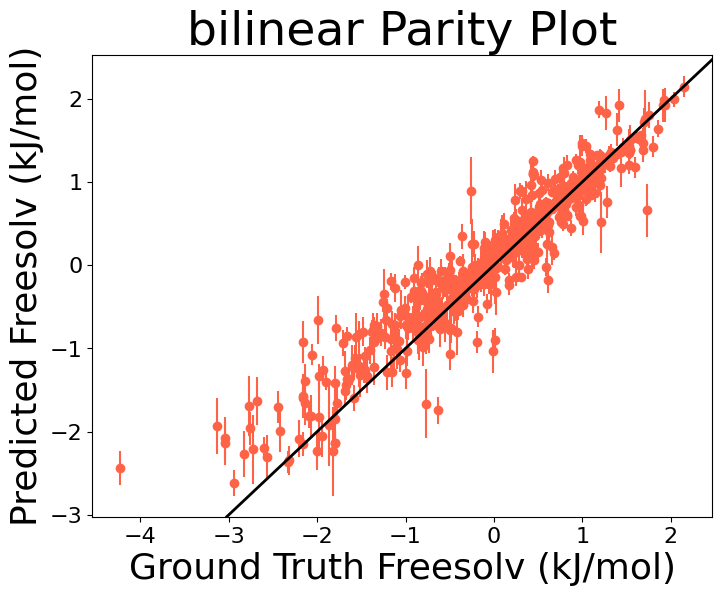

In [721]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=True)
freesolv_label = 'Freesolv (kJ/mol)'


# plot_parity(ax, data["in_dist"]["gt"], data["in_dist"]["preds"], mae_id, 'dimgrey', 'ID')
# plot_parity(ax, all_ood["gt"],all_ood["preds"], mae_ood, 'grey', 'OOD')
plot_parity(ax, data["ood"]["gt"], data["ood"]["preds"], mae_ood, 'tomato', 'OOD', yerr=data['ood']['pred_std'])
ax.scatter([], [], label=f'TPR: {TPR}', color='none')
# ax.axline((ood_gt.min(),0), (ood_gt.min(),1), linewidth=2, color='tomato')
# ax.axline((0, ood_gt.min()), (1, ood_gt.min()), linewidth=2, color='tomato')
ax.set_xlabel(f'Ground Truth Freesolv (kJ/mol)', fontsize=26)
ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel(f'Predicted Freesolv (kJ/mol)', fontsize=26)
# Dynamically set limits based on data
# set_plot_limits(ax, None, None)
title_name = 'bilinear'
ax.set_title(f'{title_name} Parity Plot', fontsize=34)
# ax.set_yscale('log')
# ax.legend(loc='upper left', fontsize=26)

In [722]:
ood_sorted = data['ood'].sort_values(by='pred_std').reset_index()
ood_sorted['error_class'] = (ood_sorted.index//(len(ood_sorted)/10)).map(int)
ood_sorted['error_class_str'] = ood_sorted['error_class'].map(str)
ood_sorted['log_pred_std'] = np.log(ood_sorted['pred_std'])

In [723]:
cdict

{'0': '#22ff00',
 '1': '#70ee00',
 '2': '#98db00',
 '3': '#b2c800',
 '4': '#c6b400',
 '5': '#d89f00',
 '6': '#e78600',
 '7': '#f46900',
 '8': '#fc4700',
 '9': '#ff0000'}

In [724]:
f'#{i}{i}{9-i}{9-i}00'

'#990000'

In [725]:
clist = [
    '#22ff00',
    '#70ee00',
    '#98db00',
    '#b2c800',
    '#c6b400',
    '#d89f00',
    '#e78600',
    '#f46900',
    '#fc4700',
    '#ff0000'
]

In [726]:
cmap = lambda i : f'#{i}{i}{9-i}{9-i}44'
cdict = {str(i) : clist[i] for i in range(10)}

px.scatter(
    ood_sorted.iloc[-1::-1], 
    x = 'gt', 
    y = 'preds', 
    color = 'error_class_str',
    color_discrete_map= cdict
)
# px.line([0,2],[0,2])

0.03


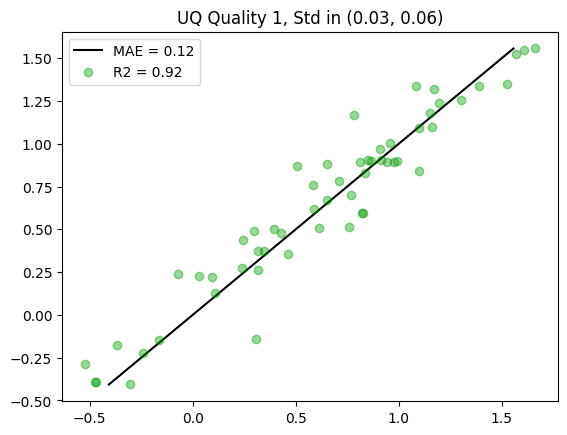

0.06


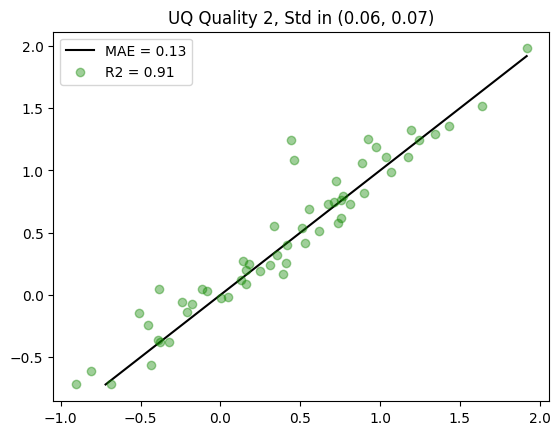

0.07


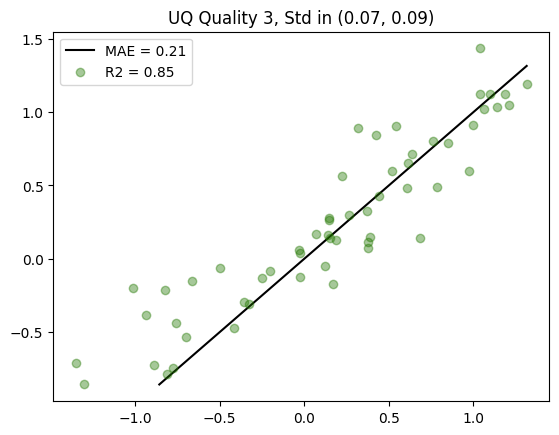

0.09


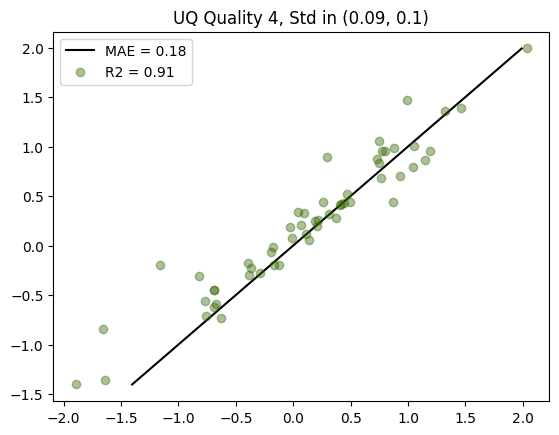

0.1


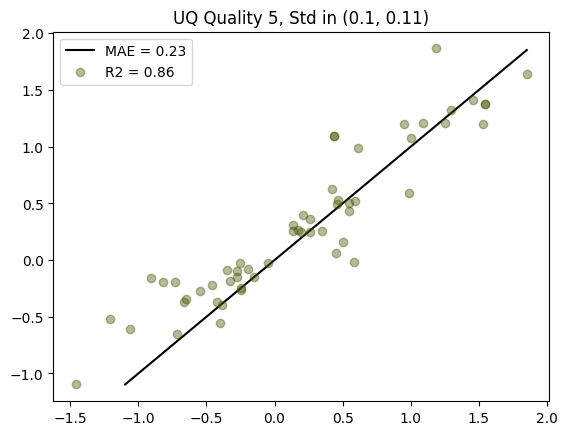

0.11


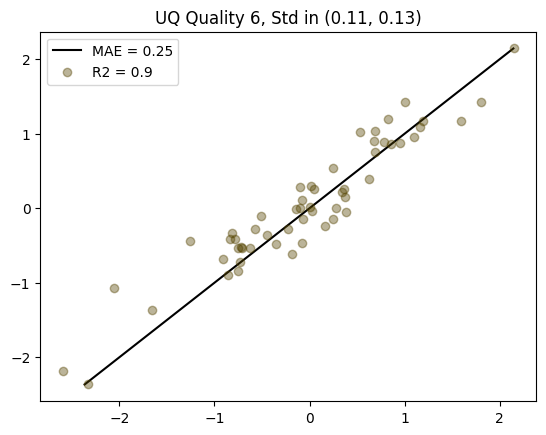

0.13


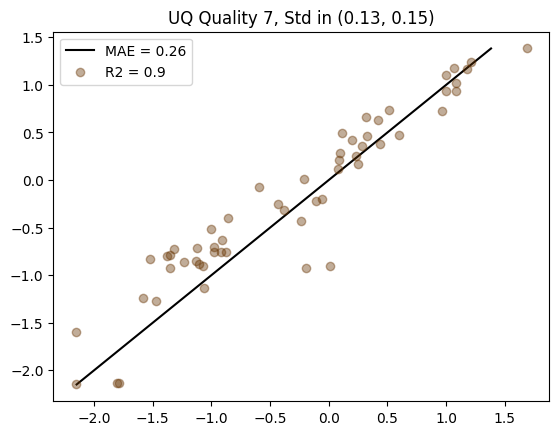

0.15


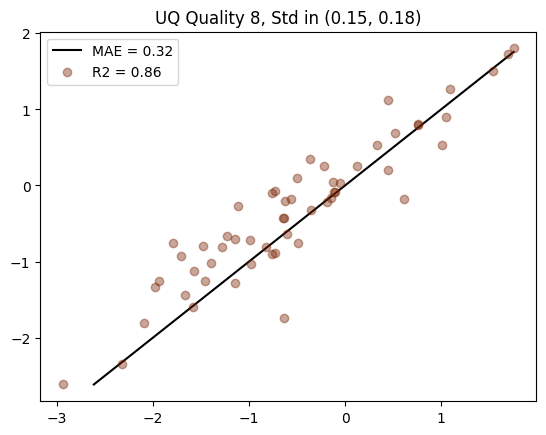

0.18


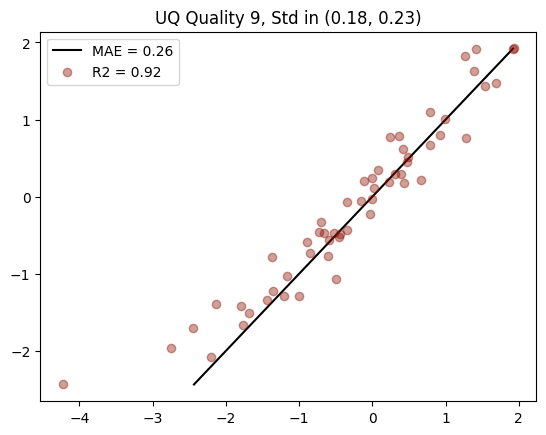

0.23


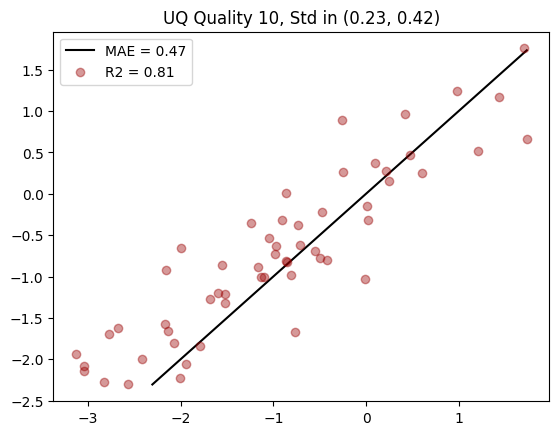

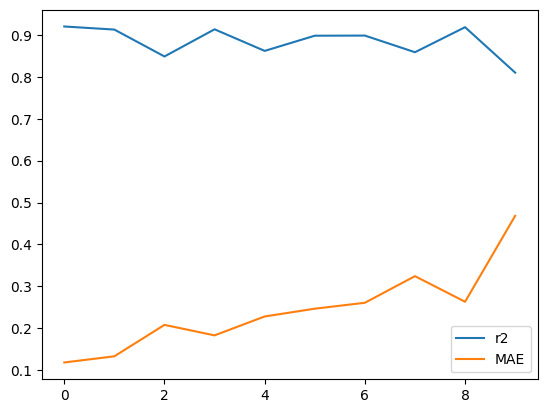

In [727]:
n = 10
sliceLen = len(ood_sorted)//n
rs = []
errors = []
for i in range(n):
    df = ood_sorted.iloc[i * sliceLen: (i + 1)*sliceLen]
    min_uq = ood_sorted.iloc[i*sliceLen]['pred_std']
    max_uq = ood_sorted.iloc[(i+1)*sliceLen]['pred_std']
    x = df['gt']
    y = df['preds']
    mmax = min(max(x), max(y))
    mmin = max(min(x),min(y))
    r2 = pearsonr(x,y).statistic**2
    rs.append(r2)
    mae = np.mean(np.abs(x - y))
    errors.append(mae)
    plt.plot([mmin, mmax],[mmin, mmax], c = 'black', zorder=-1, label = f'MAE = {round(mae, 2)}')
    plt.scatter(
        x, y, 
        c = f'#{i}{i}{9-i}{9-i}00', 
        alpha = .4, 
        zorder = i,
        label = f'R2 = {round(r2, 2)}'
    )
    print(round(min_uq, 2))
    plt.title(f"UQ Quality {i+1}, Std in ({str(round(min_uq, 2))}, {str(round(max_uq, 2))})")
    plt.legend()
    plt.show()
plt.plot(rs, label = 'r2')
plt.plot(errors, label = 'MAE')
plt.legend()
plt.show()

In [728]:
all_ood['abs_error'].mean()

np.float64(0.26614397802140477)

In [729]:
group_ood['rmse'] = group_ood['sq_error']**(1/2)

In [730]:
group_df['total_abs_error'] = abs(group_df['error'])

In [737]:
spearmanr(group_df['pred_std'], group_df['total_abs_error']).statistic

np.float64(0.31678078604019205)

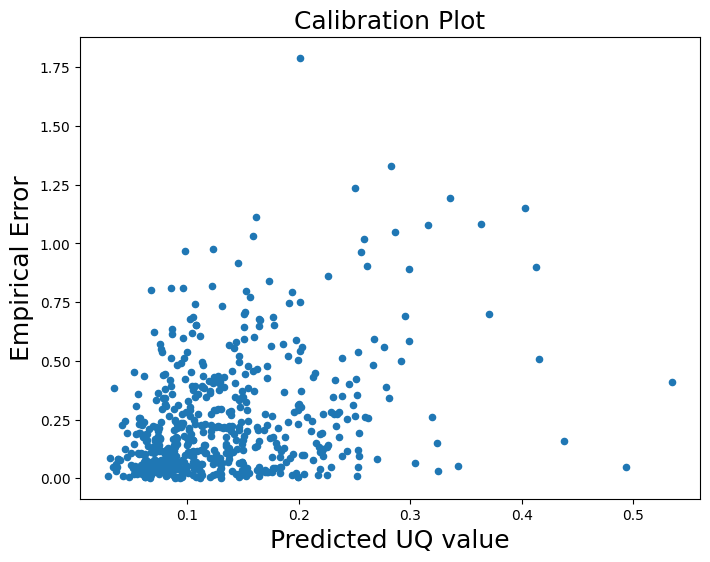

In [738]:
group_df['psih'] = group_df['pred_std_inhouse']**(1/2)
fig = group_df.plot.scatter(x='pred_std', y='total_abs_error', title = 'Bilinear Calibration Plot',
                       xlabel = 'Predicted UQ value',
                       ylabel = 'Empirical Error',
                       figsize = (8,6)
                       )
plt.xlabel('Predicted UQ value', fontsize = 18)
plt.ylabel('Empirical Error', fontsize = 18)
plt.title('Calibration Plot', fontsize = 18)
plt.show()

In [740]:
os.listdir(base_path, )

['25-07-24_03-14-05',
 '25-07-24_00-54-18',
 '25-07-24_02-45-16',
 '25-07-24_03-43-55',
 '25-07-24_04-14-48',
 '25-07-24_01-14-01',
 '25-07-24_04-46-02',
 '25-07-24_02-19-20',
 '25-07-24_01-53-50',
 '25-07-24_01-34-12']

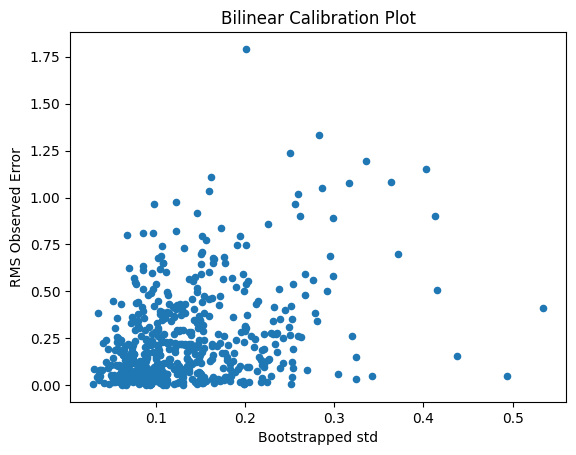

In [735]:
fig = group_df.plot.scatter(x='pred_std', y='total_abs_error', title = 'Bilinear Calibration Plot',
                       xlabel = 'Bootstrapped std',
                       ylabel = 'RMS Observed Error'
                       )

In [736]:
spearmanr(group_ood)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

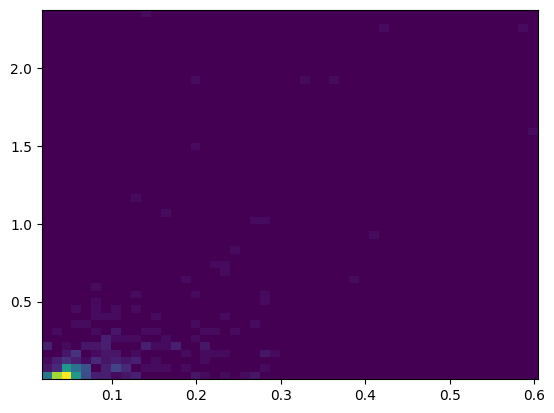

In [233]:
plt.hist2d(group_ood['pred_std'], group_ood['total_abs_error'], bins=50)
plt.show()

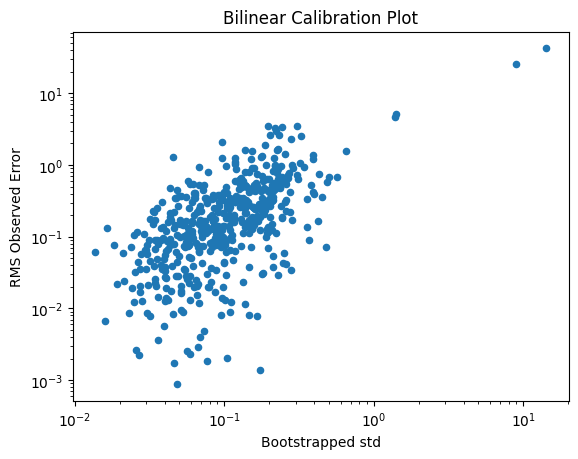

In [351]:
fig = group_ood.plot.scatter(x='pred_std', y='total_abs_error', title = 'Bilinear Calibration Plot',
                       xlabel = 'Bootstrapped std',
                       ylabel = 'RMS Observed Error'
                       )
fig.set_xscale('log')
fig.set_yscale('log')


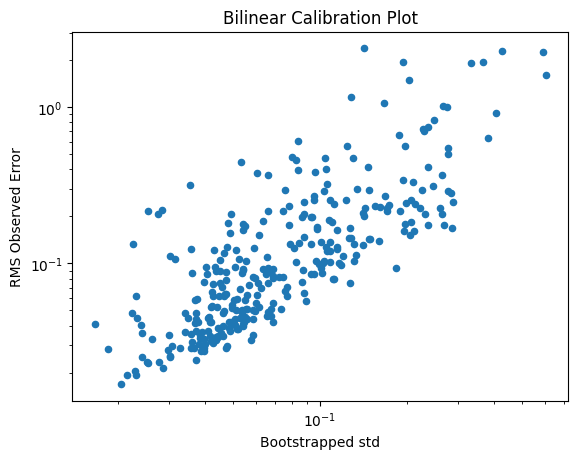

In [235]:
fig = group_ood.plot.scatter(x='pred_std', y='abs_error', title = 'Bilinear Calibration Plot',
                       xlabel = 'Bootstrapped std',
                       ylabel = 'RMS Observed Error'
                       )
fig.set_xscale('log')
fig.set_yscale('log')

# fig.show()

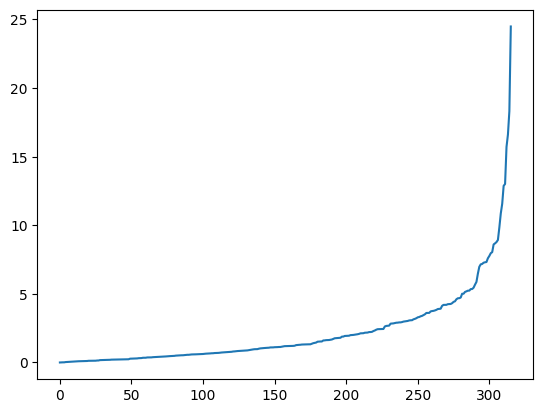

In [440]:
x = group_ood['pred_std']
y = group_ood['total_abs_error']
z = sorted(y/x)
plt.plot(z)